In [16]:
import yfinance as yf
import pandas   as pd
import numpy    as np
import matplotlib.pyplot as plt

from utils import *

import datetime as dt
import requests

In [29]:
data = yf.download("USDCAD=X", dt.datetime.today()- dt.timedelta(5000) , dt.datetime.today())
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-03-30,1.23890,1.26460,1.23820,1.26200,1.26200,0
2009-03-31,1.26180,1.26470,1.25020,1.26200,1.26200,0
2009-04-01,1.26210,1.27060,1.25730,1.25790,1.25790,0
2009-04-02,1.25860,1.26000,1.23400,1.23730,1.23730,0
2009-04-03,1.23730,1.24530,1.22950,1.23040,1.23040,0
...,...,...,...,...,...,...
2022-11-29,1.34899,1.36392,1.34097,1.34899,1.34899,0
2022-11-30,1.35836,1.35893,1.34923,1.35836,1.35836,0
2022-12-01,1.34120,1.34663,1.33946,1.34120,1.34120,0


In [30]:
def stoch_osc(df,k=14,d=3):
    """
    Source : https://www.alpharithms.com/stochastic-oscillator-in-python-483214/#:~:text=The%20stochastic%20oscillator%20is%20a,many%20advantages%20in%20algorithmic%20trading.
    """
    
    df = pd.DataFrame(df)

    df['n_high'] = df['High'].rolling(k).max()
    df['n_low'] = df['Low'].rolling(k).min()
    df['%K'] = (df['Close'] - df['n_low']) * 100 / (df['n_high'] - df['n_low'])
    df['%D'] = df['%K'].rolling(d).mean()
    
    return df

<AxesSubplot:xlabel='Date'>

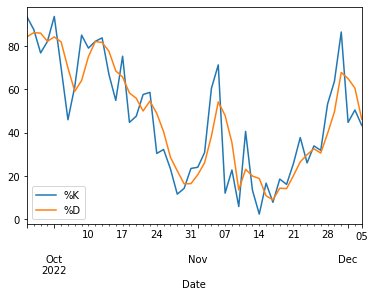

In [35]:
stoch_osc(data)[['%K','%D']].tail(50).plot()

In [101]:
sc = stoch_osc(data)[['%K','%D']].dropna()

signals=[]

for i in range(len(sc)):
        
    if (sc.iloc[i] < 20).all():
        signals.append(1)
    
    else:
        signals.append(0)

In [103]:
p = data['Close'][sc.index[0]:]


In [104]:
returns = backtester(signals,p)
dd = max_dd(returns.pct_change().dropna().values.ravel())
wr = win_rate(pd.Series(signals), returns)

<AxesSubplot:xlabel='Date'>

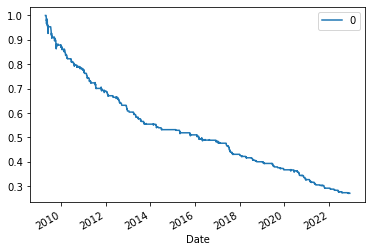

In [105]:
returns.plot()

In [106]:
dd

-0.730733356369007

In [107]:
wr

0.02480270574971815